In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

In [49]:
pd.set_option("display.max_columns", None)

In [50]:
dataset = pd.read_excel("../data/dataset_draft5_1.xlsx", index_col=0, dtype = {"gameId": "str"})
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6884 entries, 0 to 6883
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gameId                     6884 non-null   object 
 1   Blue_Adc_assistsPerTime    6884 non-null   float64
 2   Blue_Adc_deathsPerTime     6884 non-null   float64
 3   Blue_Adc_killsPerTime      6884 non-null   float64
 4   Blue_Jgl_assistsPerTime    6884 non-null   float64
 5   Blue_Jgl_deathsPerTime     6884 non-null   float64
 6   Blue_Jgl_killsPerTime      6884 non-null   float64
 7   Blue_Mid_assistsPerTime    6884 non-null   float64
 8   Blue_Mid_deathsPerTime     6884 non-null   float64
 9   Blue_Mid_killsPerTime      6884 non-null   float64
 10  Blue_Spt_assistsPerTime    6884 non-null   float64
 11  Blue_Top_assistsPerTime    6884 non-null   float64
 12  Blue_Top_deathsPerTime     6884 non-null   float64
 13  Blue_Top_killsPerTime      6884 non-null   float64
 1

In [51]:
dataset["winner"].head()

0     Red
1    Blue
2     Red
3    Blue
4    Blue
Name: winner, dtype: object

In [52]:
label_incoder = LabelEncoder()
dataset["winner"] = label_incoder.fit_transform(dataset["winner"])
dataset["winner"].head()

0    1
1    0
2    1
3    0
4    0
Name: winner, dtype: int32

In [53]:
dropped_dataset = dataset.drop(["gameId"], axis=1)
desired_X_column_list = list(dropped_dataset.columns)
desired_X_column_list.remove("winner")
dropped_dataset.drop_duplicates(desired_X_column_list)
y = dropped_dataset["winner"]
X = dropped_dataset.drop(["winner"], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6884 entries, 0 to 6883
Data columns (total 68 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Blue_Adc_assistsPerTime    6884 non-null   float64
 1   Blue_Adc_deathsPerTime     6884 non-null   float64
 2   Blue_Adc_killsPerTime      6884 non-null   float64
 3   Blue_Jgl_assistsPerTime    6884 non-null   float64
 4   Blue_Jgl_deathsPerTime     6884 non-null   float64
 5   Blue_Jgl_killsPerTime      6884 non-null   float64
 6   Blue_Mid_assistsPerTime    6884 non-null   float64
 7   Blue_Mid_deathsPerTime     6884 non-null   float64
 8   Blue_Mid_killsPerTime      6884 non-null   float64
 9   Blue_Spt_assistsPerTime    6884 non-null   float64
 10  Blue_Top_assistsPerTime    6884 non-null   float64
 11  Blue_Top_deathsPerTime     6884 non-null   float64
 12  Blue_Top_killsPerTime      6884 non-null   float64
 13  Red_Adc_assistsPerTime     6884 non-null   float64
 1

In [54]:
X.describe()

,Blue_Adc_assistsPerTime,Blue_Adc_deathsPerTime,Blue_Adc_killsPerTime,Blue_Jgl_assistsPerTime,Blue_Jgl_deathsPerTime,Blue_Jgl_killsPerTime,Blue_Mid_assistsPerTime,Blue_Mid_deathsPerTime,Blue_Mid_killsPerTime,Blue_Spt_assistsPerTime,Blue_Top_assistsPerTime,Blue_Top_deathsPerTime,Blue_Top_killsPerTime,Red_Adc_assistsPerTime,Red_Adc_deathsPerTime,Red_Adc_killsPerTime,Red_Jgl_assistsPerTime,Red_Jgl_deathsPerTime,Red_Jgl_killsPerTime,Red_Mid_assistsPerTime,Red_Mid_deathsPerTime,Red_Mid_killsPerTime,Red_Spt_assistsPerTime,Red_Top_assistsPerTime,Red_Top_deathsPerTime,Red_Top_killsPerTime,Top_wardsScorePerTimeDiff,Jgl_wardsScorePerTimeDiff,Mid_wardsScorePerTimeDiff,Adc_wardsScorePerTimeDiff,Spt_wardsScorePerTimeDiff,Spt_assistsPerTimeDiff,Top_kdaDiff,Top_killsPerTimeDiff,Top_deathsPerTimeDiff,Top_assistsPerTimeDiff,Top_creepScorePerTimeDiff,Top_goldEarnedPerTimeDiff,Jgl_kdaDiff,Jgl_killsPerTimeDiff,Jgl_deathsPerTimeDiff,Jgl_assistsPerTimeDiff,Jgl_creepScorePerTimeDiff,Jgl_goldEarnedPerTimeDiff,Mid_kdaDiff,Mid_killsPerTimeDiff,Mid_deathsPerTimeDiff,Mid_assistsPerTimeDiff,Mid_creepScorePerTimeDiff,Mid_goldEarnedPerTimeDiff,Adc_kdaDiff,Adc_killsPerTimeDiff,Adc_deathsPerTimeDiff,Adc_assistsPerTimeDiff,Adc_creepScorePerTimeDiff,Adc_goldEarnedPerTimeDiff,Blue_Winrate,Red_Winrate,Blue_GoldDiff,Red_GoldDiff,Blue_KillDiff,Red_KillDiff,teamWinrateDiff,teamGoldDiff,teamKillDiff,headtoHeadWinrate,headtoHeadGoldDiff,headtoHeadKillDiff
count,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000,6884.000000
mean,0.002583,0.001183,0.002144,0.003583,0.001481,0.001311,0.002895,0.001266,0.001728,0.004608,0.002445,0.001397,0.001331,0.002601,0.001192,0.002179,0.003625,0.001486,0.001321,0.002926,0.001273,0.001731,0.004643,0.002490,0.001390,0.001338,0.000006,-0.000027,-0.000011,0.000020,0.000033,-0.000035,-0.078364,-0.000006,0.000007,-0.000044,0.000131,-0.003846,-0.063372,-0.000010,-0.000005,-0.000042,0.000040,-0.008554,-0.027883,-0.000003,-0.000007,-0.000031,-0.000071,-0.004957,-0.045495,-0.000035,-0.000009,-0.000019,-0.000042,-0.015721,0.512732,0.510731,0.182198,0.128742,0.000171,0.000110,0.002002,0.053455,0.000061,0.495341,-0.041043,-0.000037
std,0.000793,0.000420,0.000725,0.001082,0.000490,0.000532,0.000884,0.000433,0.000637,0.001349,0.000794,0.000441,0.000514,0.000795,0.000434,0.000744,0.001091,0.000505,0.000527,0.000909,0.000448,0.000625,0.001352,0.000797,0.000440,0.000515,0.002540,0.003173,0.002866,0.003891,0.007543,0.001704,2.509211,0.000679,0.000592,0.001032,0.014589,0.724985,3.100610,0.000696,0.000653,0.001348,0.011894,0.648624,3.189385,0.000808,0.000576,0.001140,0.015021,0.750852,3.261740,0.000952,0.000573,0.001017,0.017757,0.809322,0.147692,0.149821,2.430872,2.479695,0.002330,0.002414,0.203664,3.402129,0.003310,0.181706,3.745208,0.003747
min,0.000000,0.000000,0.000000,0.000287,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000317,0.000000,0.000000,0.000379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000162,0.000189,0.000000,0.000000,-0.015805,-0.012737,-0.021289,-0.020080,-0.037054,-0.007563,-10.215000,-0.002727,-0.002847,-0.004921,-0.102547,-3.938532,-12.260000,-0.004715,-0.003784,-0.006084,-0.066410,-3.763295,-12.911667,-0.004175,-0.002859,-0.004897,-0.111712,-3.797280,

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6063907044299202


In [59]:
# 하이퍼파라미터 그리드 정의
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300, 400],
    'colsample_bytree': [0.3, 0.7]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           verbose=1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")

# 최적의 하이퍼파라미터로 모델 재학습
best_model = grid_search.best_estimator_

# 예측
y_pred_best = best_model.predict(X_test)

# 정확도 출력
mse_best = mean_squared_error(y_test, y_pred_best)
print(f"mse with tuned parameters: {mse_best:.4f}")


Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters found: {'colsample_bytree': 0.3, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300}
mse with tuned parameters: 0.3696


In [60]:
feature_importances = best_model.feature_importances_
features = list(X.columns)
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_10_features = importance_df

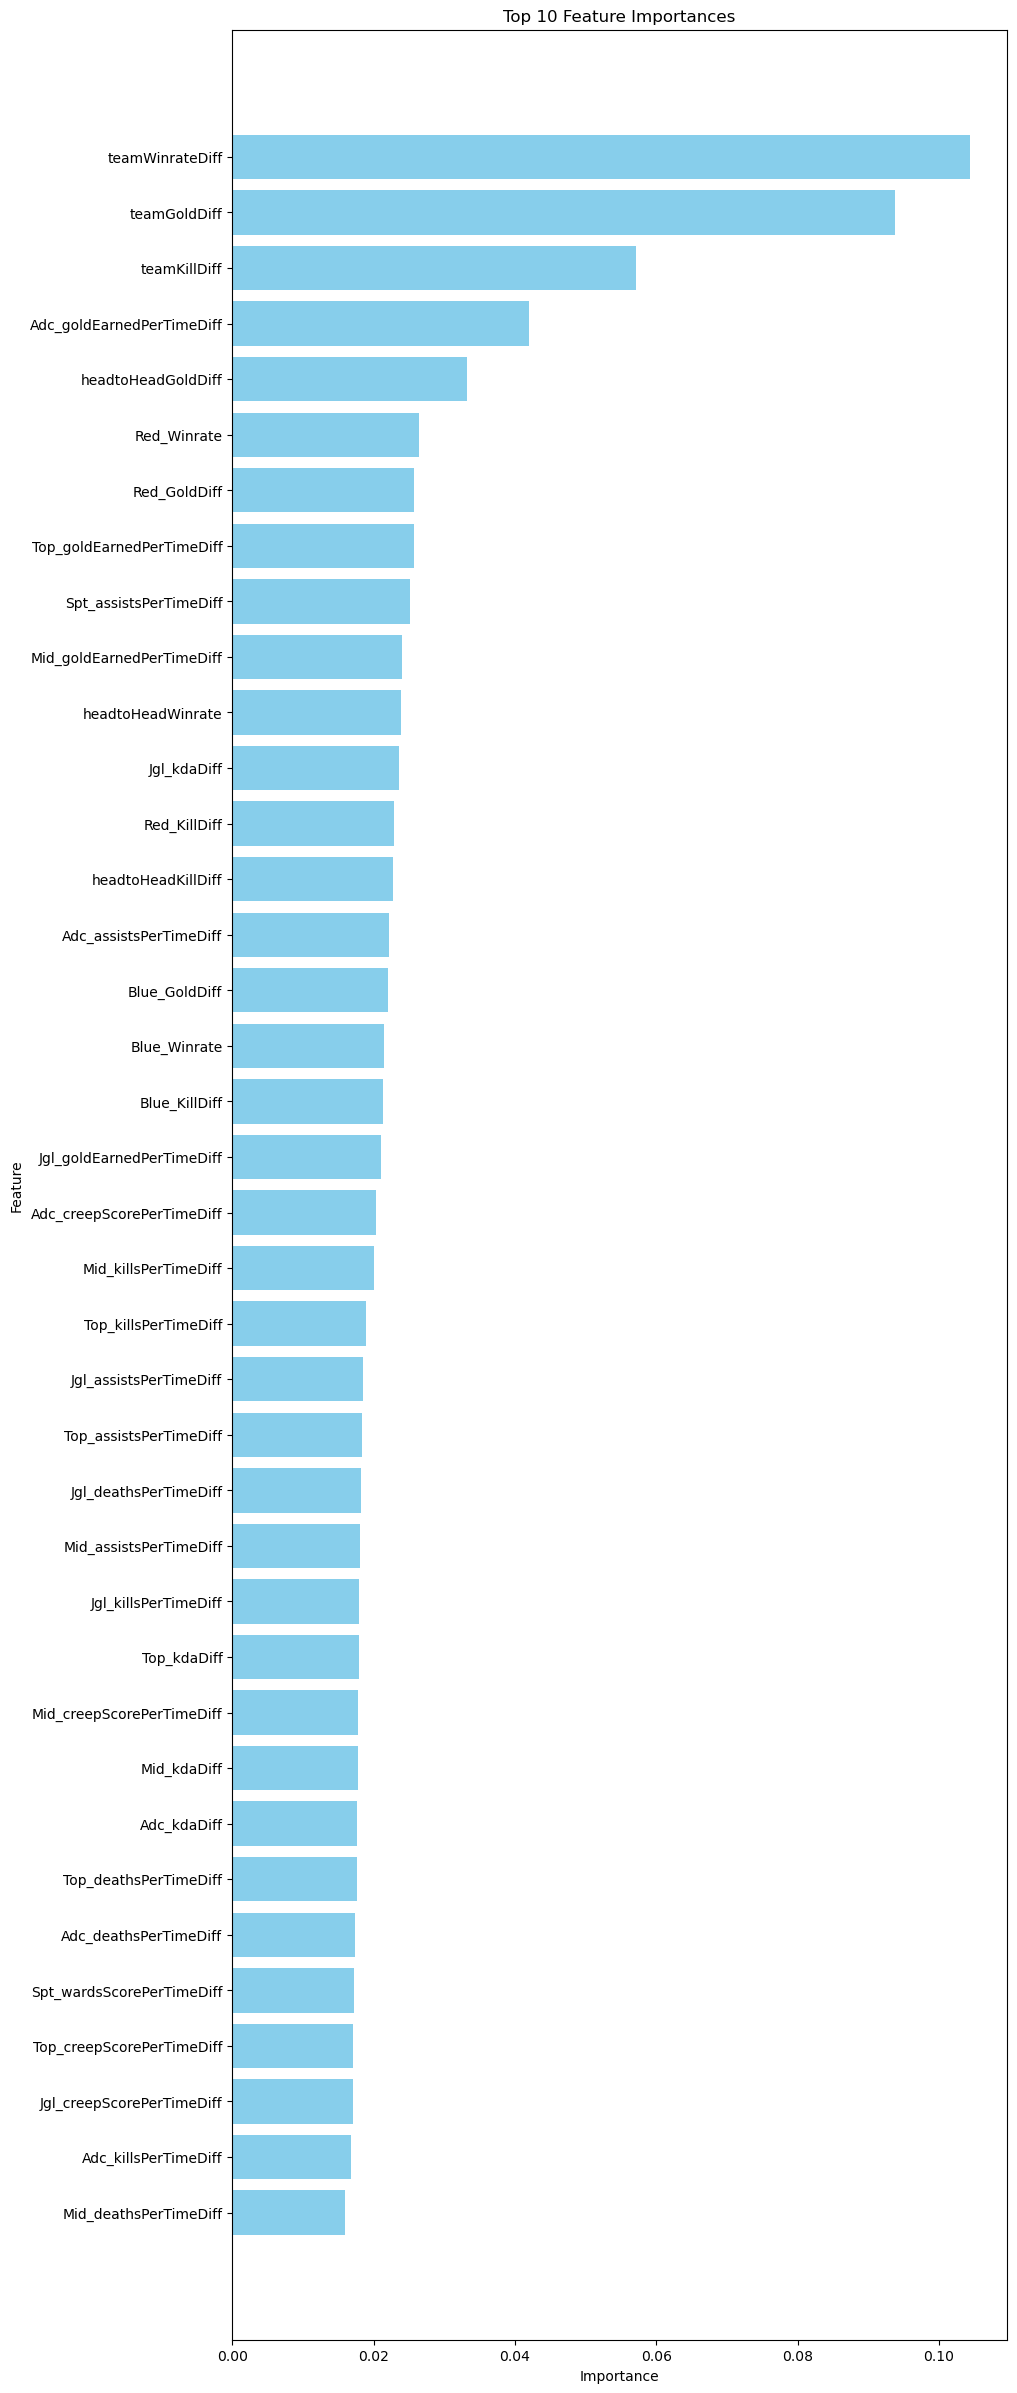

In [61]:
plt.figure(figsize=(10, 30))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()